In [1]:
# Import the necessary python packages
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

# Import datetime
from datetime import datetime

# For kinship and pedigree
import PyAGH
import graphviz

# Import API
import urllib.request, json, csv

# Generate the main dataframe

In [2]:
# Remove birds with no Dam or no Sire
# Define a function that drops rows
def filter_rows_by_values(df, col, values):
    return df[~df[col].isin(values)]

# Use the function:
# data = filter_rows_by_values(data, "sire", [None])

In [3]:
# Import the birds dataset
with urllib.request.urlopen("https://gracula.psyc.virginia.edu/birds/api/pedigree/?species=zebf") as url:
    data = pd.read_json(url)

# Clean up
data["uuid"] = data["uuid"].str[:6]
data["name"] = data["name"].str[5:]
data["sire"] = data["sire"].str[5:]
data["dam"] = data["dam"].str[5:]

# replace 'None' by 'origin' in sire/dam
data["sire"] = data["sire"].replace({None: "Origin"})
data["dam"] = data["dam"].replace({None: "Origin"})

In [4]:
# Import reserved_by
with urllib.request.urlopen("https://gracula.psyc.virginia.edu/birds/api/animals/?reserved_by=melizalab") as url:
    reservation = pd.read_json(url)

reservation = reservation[["uuid", "reserved_by"]]
reservation["uuid"] = reservation["uuid"].str[:6]

reservation = pd.merge(data, reservation, on=["uuid"])
reservation

,uuid,name,sire,dam,sex,alive,plumage,acquired_on,reserved_by
0,566d97,blue_201,blue_72,blue_113,F,False,gray,2017-04-02,melizalab
1,4a36fc,bronze_144,Origin,Origin,F,False,gray,2017-10-14,melizalab
2,8f1932,cobalt_12,purple_23,purple_77,F,False,silver,2021-02-28,melizalab
3,33ad5c,cobalt_25,purple_29,cobalt_10,F,False,gray,2021-06-21,melizalab
4,745712,cobalt_26,purple_83,cobalt_199,M,False,None,2021-06-22,melizalab
...,...,...,...,...,...,...,...,...,...
80,b3e583,purple_83,green_14,bronze_144,M,False,gray,2019-12-17,melizalab
81,fb4a53,purple_92,blue_2,blue_8,M,False,silver,2016-10-18,melizalab
82,9469b8,purple_108,red_264,purple_106,M,False,gray,2020-08-12,melizalab
83,20bc8a,purple_128,red_216,orange_143,M,False,gray,2020-10-19,melizalab


In [5]:
# Calculate the age for all the birds
today = datetime.today()

# Convert acquisition into a timestamp
birth = pd.to_datetime(data['acquired_on'])

# Calculate
data["age"] = (today - birth).dt.days

# Convert in 0 & 1
data = data*1

for index, row in data.iterrows():
    if row['alive'] == 0:
        data.at[index, 'age'] = "NA"

data

/tmp/ipykernel_47336/2812513485.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NA' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.at[index, 'age'] = "NA"


,uuid,name,sire,dam,sex,alive,plumage,acquired_on,age
0,f32cfc,blue_1,Origin,Origin,F,0,NaN,2014-04-09,NA
1,fc9219,blue_2,Origin,Origin,M,0,NaN,2014-04-09,NA
2,b44ef6,blue_3,Origin,Origin,M,0,NaN,2014-04-09,NA
3,55de87,blue_4,Origin,Origin,M,0,NaN,2014-04-09,NA
4,fafe58,blue_5,Origin,Origin,F,0,NaN,2014-04-09,NA
...,...,...,...,...,...,...,...,...,...
378,9a11f0,9a11f059,cobalt_137,cobalt_245,U,1,NaN,2024-12-09,39.0
379,90a380,90a380a0,cobalt_302,ruby_269,U,1,NaN,2024-12-30,18.0
380,7359e6,7359e6fc,cobalt_126,ruby_236,U,1,NaN,2024-12-24,24.0
381,3b5407,3b540740,cobalt_208,ruby_273,U,1,NaN,2025-01-11,6.0


In [6]:
alive_birds = []

for index, row in data.iterrows():
    if row['alive'] == 1 :
        alive_birds.append(row)

alive_birds = pd.DataFrame(alive_birds) # Create a DataFrame of alive birds only

alive_birds

,uuid,name,sire,dam,sex,alive,plumage,acquired_on,age
74,9a09b0,cobalt_110,cobalt_57,purple_174,F,1,fawn,2023-01-11,737.0
75,cec999,cobalt_114,purple_104,cobalt_84,F,1,fawn,2023-02-17,700.0
77,a9167f,cobalt_122,cobalt_32,ruby_203,M,1,gray,2023-02-09,708.0
79,abad48,cobalt_126,cobalt_206,purple_179,M,1,gray,2023-02-21,696.0
81,6a3b1f,cobalt_137,cobalt_35,cobalt_10,M,1,gray,2023-03-21,668.0
...,...,...,...,...,...,...,...,...,...
378,9a11f0,9a11f059,cobalt_137,cobalt_245,U,1,NaN,2024-12-09,39.0
379,90a380,90a380a0,cobalt_302,ruby_269,U,1,NaN,2024-12-30,18.0
380,7359e6,7359e6fc,cobalt_126,ruby_236,U,1,NaN,2024-12-24,24.0
381,3b5407,3b540740,cobalt_208,ruby_273,U,1,NaN,2025-01-11,6.0


Example of a Fertility Score Calculation (Hypothetical)

An example calculation could use specific thresholds for each factor. Suppose each of the factors contributes a score between 0 to 10, with higher scores representing better fertility potential. The formula might look like this:
F=(10−A)+H+(10−B)+L+M+S
F=(10−A)+H+(10−B)+L+M+S

Where:

    AA = Age (e.g., 30 might yield 7 points, while 40 yields 3 points)
    HH = Hormonal health (based on specific tests)
    BB = BMI (e.g., a BMI of 22 could yield 9 points, and 30 could yield 3 points)
    LL = Lifestyle (e.g., non-smoking, healthy diet = 8 points)
    MM = Medical history (e.g., no conditions = 10 points)
    SS = Semen analysis (e.g., normal sperm count = 10 points)

## Calculate kinship

In [7]:
ped = pd.DataFrame()

ped["id"] = data["name"]
ped["sire"] = data["sire"]
ped["dam"] = data["dam"]

ped = filter_rows_by_values(ped, "sire", ["Origin"]) # Filter out the birds brought from the store
ped

,id,sire,dam
16,blue_20,blue_11,blue_12
17,blue_30,blue_7,blue_13
18,blue_31,blue_7,blue_13
19,blue_34,blue_7,blue_15
20,blue_35,blue_7,blue_15
...,...,...,...
378,9a11f059,cobalt_137,cobalt_245
379,90a380a0,cobalt_302,ruby_269
380,7359e6fc,cobalt_126,ruby_236
381,3b540740,cobalt_208,ruby_273


In [8]:
ped_selected = PyAGH.selectPed(data=ped, id=["8a41fde6"], generation=5) # Print 3 generations of the chosen bird
ped_selected = PyAGH.sortPed(ped_selected)

#ped_selected

In [9]:
sort_ped = PyAGH.sortPed(ped) # Sort the pedigree first
A = PyAGH.makeA(sort_ped)

In [10]:
coef_inbreeding = PyAGH.coefInbreeding(A)
coef_inbreeding

,ID,F
0,blue_11,0.000000
1,blue_7,0.000000
2,blue_9,0.000000
3,blue_3,0.000000
4,blue_2,0.000000
...,...,...
347,purple_205,0.056427
348,purple_206,0.056427
349,8a41fde6,0.056427
350,1397716d,0.056427


In [11]:
coef_kinship = PyAGH.coefKinship(A)
coef_kinship

,ID1,ID2,r
0,blue_11,blue_11,1.000000
1,blue_11,blue_7,0.000000
2,blue_11,blue_9,0.000000
3,blue_11,blue_3,0.000000
4,blue_11,blue_2,0.000000
...,...,...,...
62123,8a41fde6,1397716d,0.531126
62124,8a41fde6,7b04739c,0.531126
62125,1397716d,1397716d,1.000000
62126,1397716d,7b04739c,0.531126


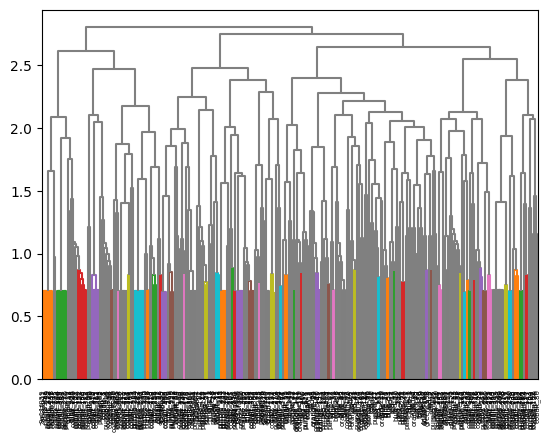

In [12]:
cluster_example = PyAGH.cluster(A)
plt.xticks(rotation=90)
plt.savefig('../output/cluster_example.png', facecolor='w', dpi=300)

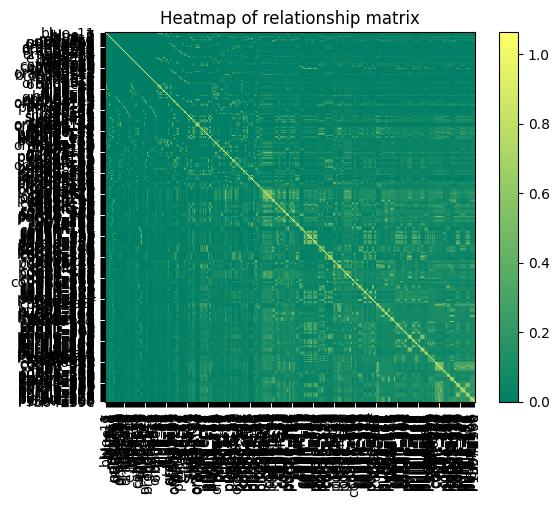

In [13]:
heatmap_example = PyAGH.heat(A)
plt.xticks(rotation=90)
plt.savefig('../output/heatmap_example.png', facecolor='w',dpi=500)

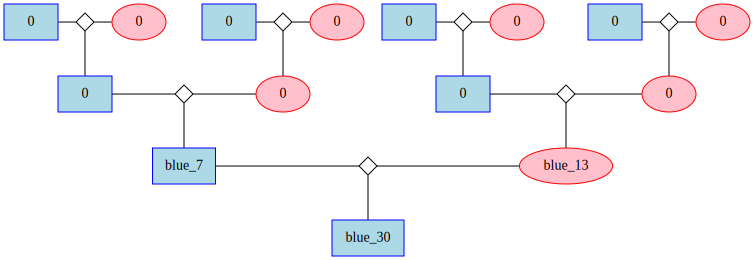

In [14]:
ped_selected = PyAGH.selectPed(data=ped,id=['blue_30'], generation=3) # Print selected number of generation of the bird
p = PyAGH.gragh(ped_selected)
graphviz.Source(p)

# Mastersheet events + birds

In [15]:
# Import the birds used for an experiment
with urllib.request.urlopen("https://gracula.psyc.virginia.edu/birds/api/events/?status=used") as url:
    used_birds = pd.read_json(url)

# Import the birds that died unexpectedly
with urllib.request.urlopen("https://gracula.psyc.virginia.edu/birds/api/events/?status=died") as url:
    died_birds = pd.read_json(url)

used_birds

,id,animal,date,status,location,description,entered_by,measurements
0,24285,d85f9640-cd97-49e9-a5f3-df6ab87513cc,2025-01-15,used for in vivo,NaN,Died during recording,smm3rc,[]
1,24281,f32afc81-0136-4ba4-ac5d-7114e060edb0,2025-01-15,used for slices,NaN,,bellanger,[]
2,24278,2c47aaa1-dba5-47f7-b670-d3d78946154b,2025-01-14,used for slices,NaN,,bellanger,[]
3,24260,f4741d6a-831b-4028-ab60-a0807d286677,2025-01-10,used for anatomy,NaN,Perfused,tbyron,[]
4,24226,1cb3fafb-7717-437a-a32d-323776a93988,2025-01-08,used for slices,NaN,ben and ram used for slices,hfugate,[]
...,...,...,...,...,...,...,...,...
95,22361,717f0805-d778-4d82-9e77-2dc559e58d6b,2024-09-12,used for in vivo,NaN,,smm3rc,[]
96,22325,c24f485c-f23a-4f1c-8ab3-6045d0bd199d,2024-09-12,used for slices,NaN,,bellanger,[]
97,22317,389e7f1c-51b5-45a3-9e8d-dcdc19a1f19a,2024-09-11,used for slices,NaN,,bellanger,[]
98,22299,e088b42d-107e-4149-b078-35eb7fdc8742,2024-09-10,used for slices,NaN,,bellanger,[]


In [16]:
# Clean up
used_birds["uuid"] = used_birds["animal"].str[:6]
died_birds["uuid"] = died_birds["animal"].str[:6]

used_birds

,id,animal,date,status,location,description,entered_by,measurements,uuid
0,24285,d85f9640-cd97-49e9-a5f3-df6ab87513cc,2025-01-15,used for in vivo,NaN,Died during recording,smm3rc,[],d85f96
1,24281,f32afc81-0136-4ba4-ac5d-7114e060edb0,2025-01-15,used for slices,NaN,,bellanger,[],f32afc
2,24278,2c47aaa1-dba5-47f7-b670-d3d78946154b,2025-01-14,used for slices,NaN,,bellanger,[],2c47aa
3,24260,f4741d6a-831b-4028-ab60-a0807d286677,2025-01-10,used for anatomy,NaN,Perfused,tbyron,[],f4741d
4,24226,1cb3fafb-7717-437a-a32d-323776a93988,2025-01-08,used for slices,NaN,ben and ram used for slices,hfugate,[],1cb3fa
...,...,...,...,...,...,...,...,...,...
95,22361,717f0805-d778-4d82-9e77-2dc559e58d6b,2024-09-12,used for in vivo,NaN,,smm3rc,[],717f08
96,22325,c24f485c-f23a-4f1c-8ab3-6045d0bd199d,2024-09-12,used for slices,NaN,,bellanger,[],c24f48
97,22317,389e7f1c-51b5-45a3-9e8d-dcdc19a1f19a,2024-09-11,used for slices,NaN,,bellanger,[],389e7f
98,22299,e088b42d-107e-4149-b078-35eb7fdc8742,2024-09-10,used for slices,NaN,,bellanger,[],e088b4


In [17]:
# Add the list of events to the mastersheet
used_birds_ = pd.merge(
    data, used_birds, on=["uuid"]
)

died_birds_ = pd.merge(
    data, died_birds, on=["uuid"]
)

# Concatenate into a mastersheet
frames = [used_birds_, died_birds_]
mastersheet = pd.concat(frames)

In [18]:
mastersheet

,uuid,name,sire,dam,sex,alive,plumage,acquired_on,age,id,animal,date,status,location,description,entered_by,measurements
0,33ad5c,cobalt_25,purple_29,cobalt_10,F,0,gray,2021-06-21,NA,22765,33ad5cef-f87d-41a2-8ccc-e9700e34a560,2024-09-25,used for anatomy,NaN,culled due to age/to make room for new birds,hfugate,[]
1,ef618d,cobalt_55,purple_89,cobalt_8,M,0,gray,2021-07-29,NA,22764,ef618d79-2ec4-40f3-b24c-80960b5b0a76,2024-09-25,used for anatomy,NaN,culled due to age/ to make room for new birds,hfugate,[]
2,f30e1b,cobalt_175,cobalt_52,cobalt_59,F,0,fawn,2023-04-26,NA,23557,f30e1bc5-5752-4cc6-a985-91cb8f2794c5,2024-11-08,used for anatomy,NaN,Injured herself and broke her femur. Had to be...,bellanger,[]
3,ada093,cobalt_318,cobalt_200,cobalt_180,M,0,gray,2024-02-17,NA,23213,ada093d8-0a27-4b84-baaf-d19fec3ce731,2024-10-25,used for in vivo,NaN,ar-synfam,bao.le,[]
4,49977a,cobalt_333,purple_166,ruby_207,M,0,gray,2024-02-26,NA,23194,49977aec-2d37-4dc2-a4fe-25f4409013a4,2024-10-24,used for anatomy,NaN,"Culled to make room in colony, was chosen due ...",hfugate,[]
5,21af3e,ruby_254,cobalt_57,purple_174,F,0,gray,2023-08-09,NA,23233,21af3ed6-09ff-4ff6-ac25-42ee9ce5acca,2024-10-28,used for anatomy,NaN,Culled for space and due to being retired from...,hfugate,[]
6,cbecce,ruby_262,cobalt_80,purple_190,M,0,gray,2023-09-06,NA,23195,cbecceae-e340-4728-848c-de9d59306d86,2024-10-24,used for anatomy,NaN,"Culled to make room in colony, was chosen due ...",hfugate,[]
7,2aa653,ruby_279,cobalt_16,cobalt_79,M,0,gray,2023-10-15,NA,22395,2aa653e5-5b44-487c-9bed-e3997d3de803,2024-09-16,used for in vivo,NaN,ar,bao.le,[]
0,b9bf3c,cobalt_80,purple_104,cobalt_158,M,0,gray,2021-10-08,NA,21950,b9bf3c4a-c16b-42ef-bf7e-159e8e21aa15,2024-08-09,died,None,Taken for euthanasia and necropsy,hfugate,[]
1,08408e,cobalt_132,cobalt_6,cobalt_9,F,0,fawn,2023-03-20,NA,23177,08408e4c-0acf-42a5-9e6d-f9a6b68cfca1,2024-10-23,died,None,Euthanized. Would have needed toe amputation a...,hfugate,[]


In [19]:
data

,uuid,name,sire,dam,sex,alive,plumage,acquired_on,age
0,f32cfc,blue_1,Origin,Origin,F,0,NaN,2014-04-09,NA
1,fc9219,blue_2,Origin,Origin,M,0,NaN,2014-04-09,NA
2,b44ef6,blue_3,Origin,Origin,M,0,NaN,2014-04-09,NA
3,55de87,blue_4,Origin,Origin,M,0,NaN,2014-04-09,NA
4,fafe58,blue_5,Origin,Origin,F,0,NaN,2014-04-09,NA
...,...,...,...,...,...,...,...,...,...
378,9a11f0,9a11f059,cobalt_137,cobalt_245,U,1,NaN,2024-12-09,39.0
379,90a380,90a380a0,cobalt_302,ruby_269,U,1,NaN,2024-12-30,18.0
380,7359e6,7359e6fc,cobalt_126,ruby_236,U,1,NaN,2024-12-24,24.0
381,3b5407,3b540740,cobalt_208,ruby_273,U,1,NaN,2025-01-11,6.0


# Add coeff_inbreeding to data

In [20]:
sort_ped = PyAGH.sortPed(ped) # Select all the birds for analysis instead of a given bird
A = PyAGH.makeA(sort_ped)

coef_inbreeding = PyAGH.coefInbreeding(A)
coef_kinship = PyAGH.coefKinship(A)

# Making it shinny
coef_inbreeding["name"] = coef_inbreeding["ID"]
coef_inbreeding["coef_inbreeding"] = coef_inbreeding["F"]
coef_inbreeding = coef_inbreeding[["name", "coef_inbreeding"]]

parent_kinship = pd.DataFrame()

parent_kinship['sire'] = coef_kinship['ID1']
parent_kinship['dam'] = coef_kinship['ID2']
parent_kinship['p_kinship'] = coef_kinship['r']

In [21]:
parent_kinship

,sire,dam,p_kinship
0,blue_11,blue_11,1.000000
1,blue_11,blue_7,0.000000
2,blue_11,blue_9,0.000000
3,blue_11,blue_3,0.000000
4,blue_11,blue_2,0.000000
...,...,...,...
62123,8a41fde6,1397716d,0.531126
62124,8a41fde6,7b04739c,0.531126
62125,1397716d,1397716d,1.000000
62126,1397716d,7b04739c,0.531126


In [22]:
data = pd.merge(
    data, coef_inbreeding, on=["name"]
)

# Filter out birds that were bought from the store
data = filter_rows_by_values(data, "sire", ['Origin'])
data = filter_rows_by_values(data, "sire", ['Origin'])

In [23]:
data

,uuid,name,sire,dam,sex,alive,plumage,acquired_on,age,coef_inbreeding
11,00599f,blue_20,blue_11,blue_12,M,0,NaN,2014-05-04,NA,-0.000000
12,f941a8,blue_30,blue_7,blue_13,M,0,NaN,2014-05-08,NA,-0.000000
13,5e367c,blue_31,blue_7,blue_13,F,0,NaN,2014-05-08,NA,-0.000000
14,f1ddb4,blue_34,blue_7,blue_15,M,0,NaN,2014-05-12,NA,-0.000000
15,32cf7f,blue_35,blue_7,blue_15,F,0,NaN,2014-05-12,NA,-0.000000
...,...,...,...,...,...,...,...,...,...,...
347,9a11f0,9a11f059,cobalt_137,cobalt_245,U,1,NaN,2024-12-09,39.0,0.021851
348,90a380,90a380a0,cobalt_302,ruby_269,U,1,NaN,2024-12-30,18.0,0.060684
349,7359e6,7359e6fc,cobalt_126,ruby_236,U,1,NaN,2024-12-24,24.0,0.017578
350,3b5407,3b540740,cobalt_208,ruby_273,U,1,NaN,2025-01-11,6.0,0.024170


# Extract the parents kinship

In [24]:
list = pd.DataFrame()

In [25]:
# Test filtering
filtered_df = coef_kinship.loc[coef_kinship['ID1'].eq('cobalt_126') & coef_kinship['ID2'].eq('ruby_236')]
list = pd.concat([list, filtered_df], ignore_index=True)

In [26]:
master = pd.merge(data, parent_kinship, how="left", on=['sire', 'dam'])
master

,uuid,name,sire,dam,sex,alive,plumage,acquired_on,age,coef_inbreeding,p_kinship
0,00599f,blue_20,blue_11,blue_12,M,0,NaN,2014-05-04,NA,-0.000000,0.000000
1,f941a8,blue_30,blue_7,blue_13,M,0,NaN,2014-05-08,NA,-0.000000,0.000000
2,5e367c,blue_31,blue_7,blue_13,F,0,NaN,2014-05-08,NA,-0.000000,0.000000
3,f1ddb4,blue_34,blue_7,blue_15,M,0,NaN,2014-05-12,NA,-0.000000,0.000000
4,32cf7f,blue_35,blue_7,blue_15,F,0,NaN,2014-05-12,NA,-0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
298,9a11f0,9a11f059,cobalt_137,cobalt_245,U,1,NaN,2024-12-09,39.0,0.021851,NaN
299,90a380,90a380a0,cobalt_302,ruby_269,U,1,NaN,2024-12-30,18.0,0.060684,NaN
300,7359e6,7359e6fc,cobalt_126,ruby_236,U,1,NaN,2024-12-24,24.0,0.017578,NaN
301,3b5407,3b540740,cobalt_208,ruby_273,U,1,NaN,2025-01-11,6.0,0.024170,0.047898


# Kinship score

In [27]:
# Calculate the median and the respective quartiles
p_k_mean = master['p_kinship'].mean()
p_k_median = master['p_kinship'].median()

In [28]:
master['p_k_mean'] = p_k_mean

In [29]:
master

,uuid,name,sire,dam,sex,alive,plumage,acquired_on,age,coef_inbreeding,p_kinship,p_k_mean
0,00599f,blue_20,blue_11,blue_12,M,0,NaN,2014-05-04,NA,-0.000000,0.000000,0.020104
1,f941a8,blue_30,blue_7,blue_13,M,0,NaN,2014-05-08,NA,-0.000000,0.000000,0.020104
2,5e367c,blue_31,blue_7,blue_13,F,0,NaN,2014-05-08,NA,-0.000000,0.000000,0.020104
3,f1ddb4,blue_34,blue_7,blue_15,M,0,NaN,2014-05-12,NA,-0.000000,0.000000,0.020104
4,32cf7f,blue_35,blue_7,blue_15,F,0,NaN,2014-05-12,NA,-0.000000,0.000000,0.020104
...,...,...,...,...,...,...,...,...,...,...,...,...
298,9a11f0,9a11f059,cobalt_137,cobalt_245,U,1,NaN,2024-12-09,39.0,0.021851,NaN,0.020104
299,90a380,90a380a0,cobalt_302,ruby_269,U,1,NaN,2024-12-30,18.0,0.060684,NaN,0.020104
300,7359e6,7359e6fc,cobalt_126,ruby_236,U,1,NaN,2024-12-24,24.0,0.017578,NaN,0.020104
301,3b5407,3b540740,cobalt_208,ruby_273,U,1,NaN,2025-01-11,6.0,0.024170,0.047898,0.020104


# Extract DATA for a list of birds

In [30]:
input_table = pd.read_csv("../input/list_input.csv")

In [31]:
# Filter the birds from the input list out of the mastersheet
selected_rows = master[master['name'].isin(input_table['name'])]

# Selected group mean and median
selected_rows['p_group_median'] = selected_rows['p_kinship'].median()
selected_rows['p_group_mean'] = selected_rows['p_kinship'].mean()
selected_rows['p_group_upper'] = selected_rows['p_kinship'].quantile(0.75)
selected_rows['p_group_lower'] = selected_rows['p_kinship'].quantile(0.25)

selected_rows

/tmp/ipykernel_47336/1124657153.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows['p_group_median'] = selected_rows['p_kinship'].median()
/tmp/ipykernel_47336/1124657153.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows['p_group_mean'] = selected_rows['p_kinship'].mean()
/tmp/ipykernel_47336/1124657153.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

,uuid,name,sire,dam,sex,alive,plumage,acquired_on,age,coef_inbreeding,p_kinship,p_k_mean,p_group_median,p_group_mean,p_group_upper,p_group_lower
298,9a11f0,9a11f059,cobalt_137,cobalt_245,U,1,NaN,2024-12-09,39.0,0.021851,NaN,0.020104,0.047898,0.047898,0.047898,0.047898
299,90a380,90a380a0,cobalt_302,ruby_269,U,1,NaN,2024-12-30,18.0,0.060684,NaN,0.020104,0.047898,0.047898,0.047898,0.047898
300,7359e6,7359e6fc,cobalt_126,ruby_236,U,1,NaN,2024-12-24,24.0,0.017578,NaN,0.020104,0.047898,0.047898,0.047898,0.047898
301,3b5407,3b540740,cobalt_208,ruby_273,U,1,NaN,2025-01-11,6.0,0.024170,0.047898,0.020104,0.047898,0.047898,0.047898,0.047898
302,a34d65,a34d65d3,cobalt_137,cobalt_245,U,1,NaN,2024-12-08,40.0,0.021851,NaN,0.020104,0.047898,0.047898,0.047898,0.047898


# Kinship score relative to the group

A kinship score shall be attributed for each birds according to the parents kinship, with:
- k = 10 when p_kinship = 0
- k = 7 when 0 < p < median
- k = 4 when median < p < upper quartile
- k = 0 when p > upper quartile

In [39]:
# Definition of the function kinship_score
def k_score(row):
    median = row['p_group_median']
    upper = row['p_group_upper']
    if row['p_kinship'] == 0:
        return 10
    elif 0 < row['p_kinship'] < median :
        return 7
    elif median <= row['p_kinship'] <= upper :
        return 4
    elif row['p_kinship'] > upper :
        return 0
    else:
        return "NA"

In [40]:
selected_rows['k_score'] = selected_rows.apply(k_score, axis=1)

/tmp/ipykernel_47336/2606378015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows['k_score'] = selected_rows.apply(k_score, axis=1)


In [41]:
selected_rows

,uuid,name,sire,dam,sex,alive,plumage,acquired_on,age,coef_inbreeding,p_kinship,p_k_mean,p_group_median,p_group_mean,p_group_upper,p_group_lower,k_score
298,9a11f0,9a11f059,cobalt_137,cobalt_245,U,1,NaN,2024-12-09,39.0,0.021851,NaN,0.020104,0.047898,0.047898,0.047898,0.047898,NA
299,90a380,90a380a0,cobalt_302,ruby_269,U,1,NaN,2024-12-30,18.0,0.060684,NaN,0.020104,0.047898,0.047898,0.047898,0.047898,NA
300,7359e6,7359e6fc,cobalt_126,ruby_236,U,1,NaN,2024-12-24,24.0,0.017578,NaN,0.020104,0.047898,0.047898,0.047898,0.047898,NA
301,3b5407,3b540740,cobalt_208,ruby_273,U,1,NaN,2025-01-11,6.0,0.024170,0.047898,0.020104,0.047898,0.047898,0.047898,0.047898,NA
302,a34d65,a34d65d3,cobalt_137,cobalt_245,U,1,NaN,2024-12-08,40.0,0.021851,NaN,0.020104,0.047898,0.047898,0.047898,0.047898,NA


In [35]:
master.to_csv("../output/master.csv")
selected_rows.to_csv("../output/selected_birds.csv")